In [7]:
import pandas as pd
import pygwalker as pyg
from matplotlib import pyplot as plt

In [8]:
df = pd.read_csv('health_insurance.csv',encoding='utf-8')
columns_to_keep = ['시도별(1)', '2020', '2021','2022']
df = df[columns_to_keep]
df_filtered = df[df['시도별(1)'] != '시도별(1)']
def replace_names(name):
    replacements =  {
    '계': 'Total',
    '서울특별시': 'Seoul',
    '부산광역시': 'Busan',
    '대구광역시': 'Daegu',
    '인천광역시': 'Incheon',
    '광주광역시': 'Gwangju',
    '대전광역시': 'Daejeon',
    '울산광역시': 'Ulsan',
    '세종특별자치시': 'Sejong',
    '경기도': 'Gyeonggi',
    '강원특별자치도': 'Gangwon',
    '충청북도': 'Chungbuk',
    '충청남도': 'Chungnam',
    '전라북도': 'Jeonbuk',
    '전라남도': 'Jeonnam',
    '경상북도': 'Gyeongbuk',
    '경상남도': 'Gyeongnam',
    '제주특별자치도': 'Jeju'
}
    return replacements.get(name, name)

# 修改索引名
df_filtered['시도별(1)'] = df_filtered['시도별(1)'].apply(replace_names)

# 修改列名
df_filtered.rename(columns={'시도별(1)': 'City'}, inplace=True)

# 设置新的索引
df_filtered.set_index('City', inplace=True)
print(df_filtered.columns)
# 转换这些列的数据类型
columns_to_convert = ['2020', '2021', '2022']
df_filtered[columns_to_convert] = df_filtered[columns_to_convert].apply(pd.to_numeric, errors='coerce').astype('Int64')
walker = pyg.walk(df_filtered)

C:\Users\a normal person\AppData\Local\Temp\ipykernel_34456\681279394.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['시도별(1)'] = df_filtered['시도별(1)'].apply(replace_names)
C:\Users\a normal person\AppData\Local\Temp\ipykernel_34456\681279394.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns={'시도별(1)': 'City'}, inplace=True)
C:\Users\a normal person\AppData\Local\Temp\ipykernel_34456\681279394.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

Index(['2020', '2021', '2022'], dtype='object')


Box(children=(HTML(value='\n<div id="ifr-pyg-00061de473337dcfpGqIcWVz6wvtdFyQ" style="height: auto">\n    <hea…

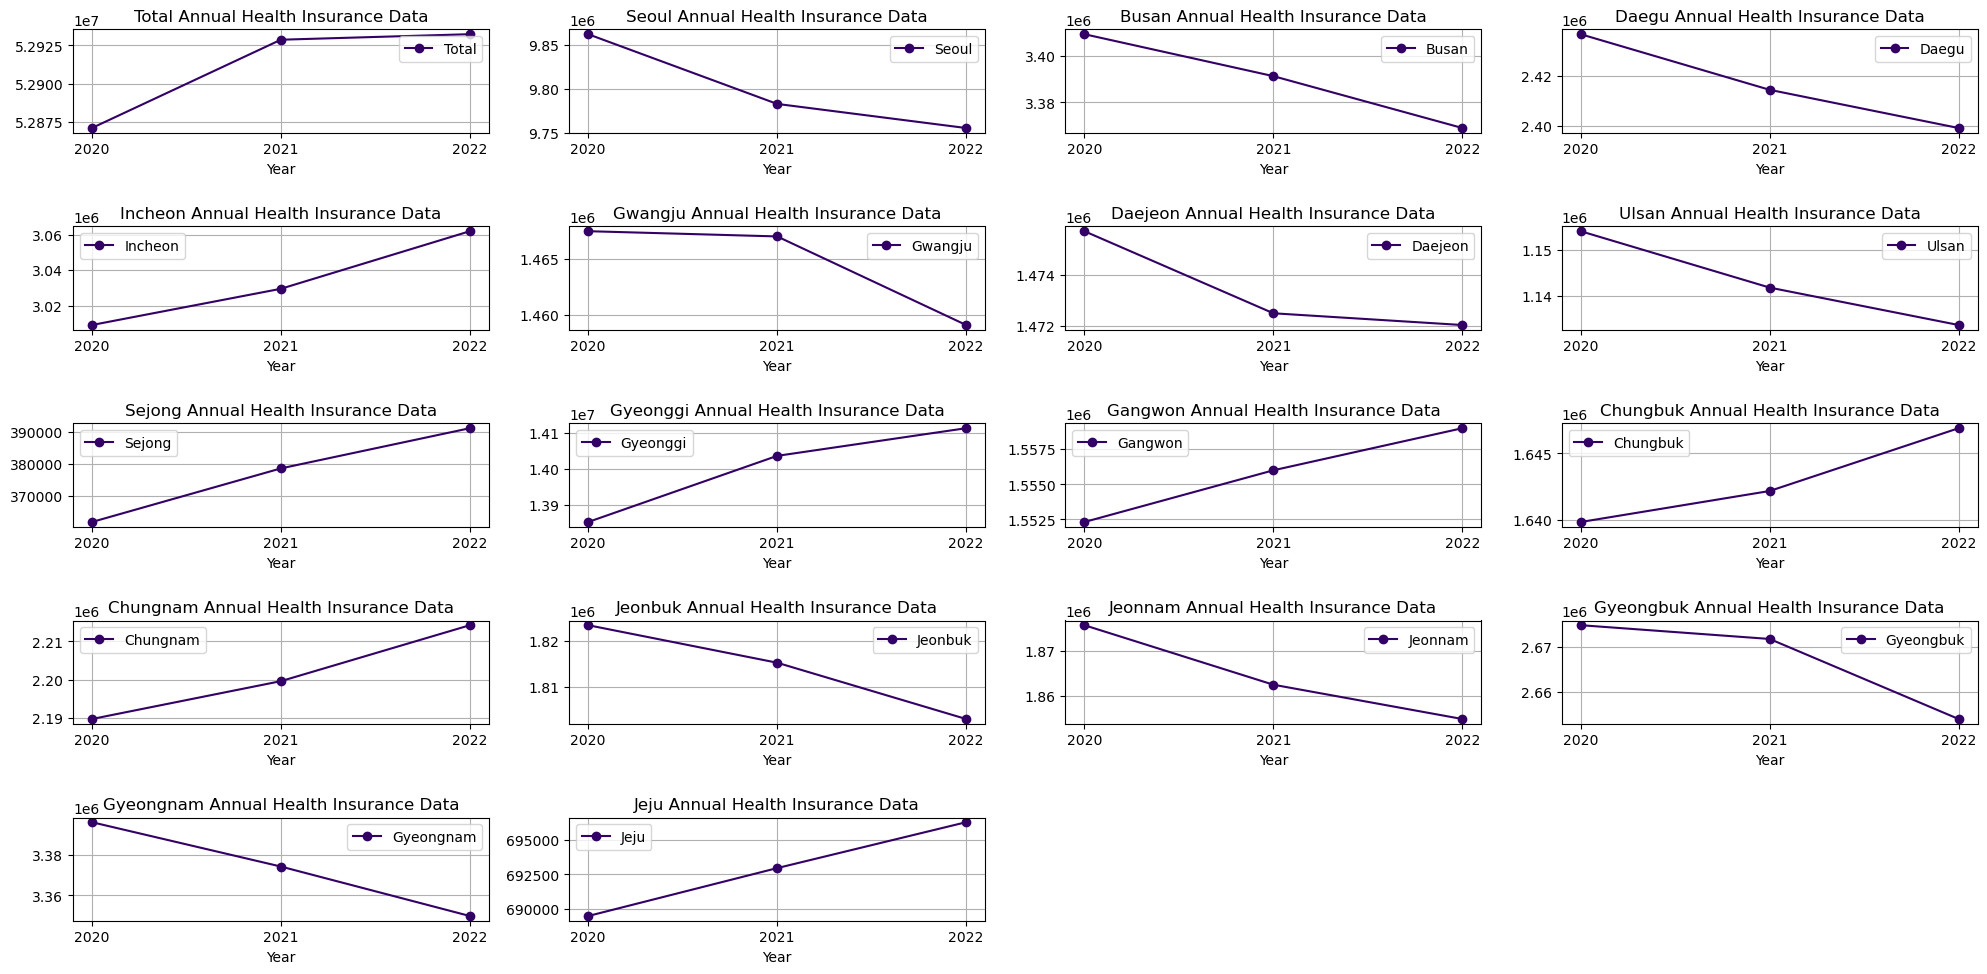

In [11]:
import matplotlib.pyplot as plt

# 假设 df_filtered 和 columns_to_convert 已经定义好

years = df_filtered.columns
num_cities = len(df_filtered.index)
num_cols = 4  # 每行显示的图数量
num_rows = (num_cities + num_cols - 1) // num_cols  # 计算总行数

# 创建子图
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
axes = axes.flatten()

# 为每个城市创建折线图
for i, city in enumerate(df_filtered.index):
    ax = axes[i]
    ax.plot(years, df_filtered.loc[city, columns_to_convert], marker='o', label=city, color='#330066')
    ax.set_title(f'{city} Annual Health Insurance Data')
    ax.set_xlabel('Year')
    #ax.set_ylabel('Count of citizens who are in health insurance')
    ax.grid(True)
    ax.legend()

# 删除多余的子图
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()
